<center>
Reinforcement Learning
    
# Practice 1 - K-armed Bandit Algorithms
    
</center>

The purpose of this homework is to study different properties of multi-armed bandit algorithms.

In [203]:
# You are only allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt


In [204]:
R = np.empty(0)
R = np.append(R,3)
N = np.zeros(5)
N += 1
N += 1
print(np.ones(2))

[1. 1.]


**General Notes:**
- Do not use a mix of python lists and numpy arrays. Every vector or matrix in your code should be a numpy array. 
- For functions that exist in both the python core and the numpy library, use the one in the numpy library. For example, use `np.max` instead of `max`. Another example: use `np.random.normal` instead of `random.gauss`.
- Make sure all of your plots have a proper size and include `xlabel`, `ylabel`, `legend`, `title`, and `grid`.

### Part 1 - Bandit Class
(a) Implement a bandit class, by completing the following code. This class should at least have two functions, one for returning the number of arms, and the other for pulling a given arm and returning a reward. 

In [205]:
# this is your Bandit class. Complete the code.
class Bandit:
    def __init__(self, means, sigmas) -> None:
        self.means = means
        self.sigmas = sigmas

    def K(self):
        #--- Your code here ---#
        # complete the function to return number of arms
        return len(self.means)

    def pull(self, k):
        #--- Your code here ---#
        # complete the function to return a reward for the selected arm 
        # using a normal distribution with the given mean and sigma
        return np.random.normal(self.means[k],self.sigmas)

(b) Test your Bandit class on a 2-armed bandit with true arm values [-1, 1] (i.e. means) and variance of 1.0. Instantiate your Bandit class and use it to get the number of arms, $K$. Then pull the first arm 1000 times and report the mean of the total reward you received.

In [206]:
# instantiate the Bandit class with the given parameters
#--- Your code here ---#
means = [-1,1]
sigmas = 1
mybandit = Bandit(means,sigmas)

# print the numner of arms
#--- Your code here ---#
print(mybandit.K())

# calculate and print the mean for playing the second arm 100 times
#--- Your code here ---#
k = 0
reward = np.mean([mybandit.pull(k) for i in range(1000)])
print(reward)


2
-1.0421946166879652


### Part 2 - Policy Class

(a) Make a *random* policy class that selects arms randomly using the following template. Your class should have: (i) a reset function for resetting the estimations, $Q$ and the number of times each arm was selected $N$, (ii) a function for selecting an arm using the current estimate $Q$, (iii) and a function that updates the estimate $Q$ according to the incremental averaging method. 

In [207]:
class RandomPolicy:
    def __init__(self, K) -> None:
        self.K = K
        self.reset()

    def reset(self):
        #--- Your code here ---#
        # initialize/reset estimates N, Q
        Q = np.zeros(self.K)
        N = np.zeros(self.K)
        return N,Q

    def choose_arm(self, t, Q, N):
        #--- Your code here ---#
        # complete the function to choose an arm. 
        # you might not need to pass the argument t but do not remove it yet
        return np.random.choice(self.K,1)[0]

    def update_estimate(self,k, r, Q, N):
        #--- Your code here ---#
        # update estimates for Q and N using the incremental averaging
        N[k] += 1
        Q[k] += 1/N[k]*(r-Q[k])
        return Q,N


(b) Similarly, implement a *UCB* policy class. Compared to the random policy class, the only difference would be in the arm selection strategy where you should use the UCB strategy.

In [208]:
class UCBPolicy:
    def __init__(self, K,c) -> None:
        self.K = K
        self.reset()
        self.c=c

    def reset(self):
        #--- Your code here ---#
        # initialize/reset estimates N, Q
        Q = np.zeros(self.K)
        N = np.zeros(self.K)
        return N,Q

    def choose_arm(self, t, Q, N):
        #--- Your code here ---#
        # complete the function to choose an arm.
        # you might not need to pass the argument t but do not remove it yet
        index = np.argmax(Q+self.c*np.sqrt(np.log(t) / N))
        return index
        # return index

    def update_estimate(self,k, r, Q, N):
        #--- Your code here ---#
        # update estimates for Q and N using the incremental averaging
        N[k] += 1
        Q[k] += 1/N[k]*(r-Q[k])
        return Q, N


(c) Similarly, implement an $\epsilon-$greedy policy class. The only difference would be in the arm selection strategy where you should use the $\epsilon-$greedy strategy.

In [209]:
class EpsilonGreedyPolicy:
    def __init__(self, K, epsilon) -> None:
        self.K = K
        self.epsilon = epsilon
        self.reset()

    def reset(self):
        #--- Your code here ---#
        # initialize/reset estimates N, Q
        Q = np.zeros(self.K)
        N = np.zeros(self.K)
        return N,Q

    def choose_arm(self, t, Q, N):
        #--- Your code here ---#
        # complete the function to choose an arm.
        # you might not need to pass the argument t but do not remove it yet
        if np.random.rand(1) >= self.epsilon:
            return np.argmax(Q)
        else:
            return np.random.choice(self.K,1)[0]

    def update_estimate(self,k, r, Q, N):
        #--- Your code here ---#
        # update estimates for Q and N using the incremental averaging
        N[k] += 1
        Q[k] += 1/N[k]*(r-Q[k])
        return Q,N

(d) Test your policy classes on a 2-armed bandit with means [0.1, 1] and variance 1.0. First write a function that plays a given bandit using a given policy for a certain number of time-steps and returns a reward history (a numpy array). Instantiate three policy classes you developed (random, ucb, and $\epsilon-$greedy). Then plot reward history for all three plays in one plot. Hint: this plot will look noisy.

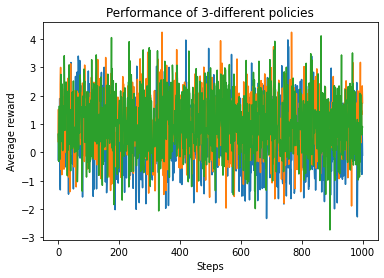

In [236]:
# complete the following function.

def play(bandit, policy, ts):
    # this function plays a given bandit using 
    # a given policy for a given number of steps. 
    # it returns a reward history
    #--- Your code here ----#
    N,Q = policy.reset()
    R = np.empty(0)
    # Playing for the 1st round to avoid divide by zero
    for k in range (bandit.K()):
        R = np.append(R,bandit.pull(k))
    N+=1
    for t in range(bandit.K(), ts):
        # print(N)
        A = policy.choose_arm(t, Q, N)
        # print(A)
        r = bandit.pull(A)
        Q, N = policy.update_estimate(A, r, Q, N)
        R = np.append(R,r)
    return R


#--- Your code here ----#
# test the play function on the 2-armed bandit with 
# three policies and plot the rewards in one graph
mybandit = Bandit([0.1,1],1)
R_random = play(mybandit,RandomPolicy(mybandit.K()),ts=1000)
R_UCB = play(mybandit,UCBPolicy(mybandit.K(),c=2),ts=1000)
R_Epsilon = play(mybandit,EpsilonGreedyPolicy(mybandit.K(),epsilon=0.1),ts=1000)
plt.plot(range(1000),R_random,label="Random")
plt.plot(R_UCB,label="UCB")
plt.plot(range(1000),R_Epsilon,label="Epsilon_greedy")
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title("Performance of 3-different policies")
plt.show()



### Part 3 - Testbed

(a) build a testbed by generating 500 randomly selected 7-armed bandits. For each bandit problem, select the true arm value ($Q^*$) from a Gaussian distribution with mean 0.0 and variance 1.0. For each selected action $a$, the bandit should return an actual reward from a Gaussian distribution with mean $Q^*(a)$ and variance 1.0. Our goal is to evaluate the three policies that we developed by averaging their performance over the 500 bandit problems. In other words, using each policy, we play each generated 7-armed bandit for 1000 steps. Then for each policy, we average the results over the 500 generated 7-armed bandits.

Note that we refer to one run as playing a single bandit problem for a certain number of time steps. Therefore, in this case, one run includes 1000 time-steps.

You should get results for the following scenarios:

1. using random policy
2. using greedy policy
3. using $\epsilon-$greedy policy with $\epsilon=0.1$ and $\epsilon=0.01$
4. using upper-confidence bound policy with $c=1$ and $c=2$

For all the 6 scenarios, plot the average reward (averaged over the 500 different bandits).

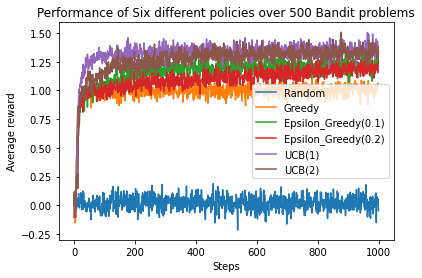

In [237]:
# Complete the following function

def generate_bandit(mean, sigma, num_arms):
    # this function generates the means of a k-armed bandit 
    # using a specific distribution (in this case, N(0,1)
    # and returns the k-armed bandit means
    #--- Your code here ----#
    return np.random.normal(mean,sigma,num_arms)


# Implement the main testbed experiment
# 1- instantiate the 6 policies
# 2- in each run generate a new bandit means, use the means to instantiate a bandit class
# and play that bandit with all 6 policies and keep the results
# 3- repeat previous step, 500 times
# 4- average the results over the number of runs and plot the reward graphs in one plot
#--- Your code here ----#
result = np.zeros((6,500,1000))
for run in range(500):
    mybandit = Bandit(generate_bandit(mean=0,sigma=1,num_arms=7),1)
    random_policy = RandomPolicy(mybandit.K())
    greedy_policy = EpsilonGreedyPolicy(mybandit.K(),epsilon=0)
    eps_greedy_policy1 = EpsilonGreedyPolicy(mybandit.K(),epsilon=0.1)
    eps_greedy_policy2 = EpsilonGreedyPolicy(mybandit.K(),epsilon=0.01)
    ucb_policy1 = UCBPolicy(mybandit.K(),c=1)
    ucb_policy2 = UCBPolicy(mybandit.K(),c=2)
    result[0][run][:]=play(mybandit,random_policy,ts=1000)
    result[1][run][:]=play(mybandit,greedy_policy,ts=1000)
    result[2][run][:]=play(mybandit,eps_greedy_policy1,ts=1000)
    result[3][run][:]=play(mybandit,eps_greedy_policy2,ts=1000)
    result[4][run][:]=play(mybandit,ucb_policy1,ts=1000)
    result[5][run][:]=play(mybandit,ucb_policy2,ts=1000)
X = np.mean(result, axis=1)
plt.plot(X[0][:], label="Random")
plt.plot(X[1][:], label="Greedy")
plt.plot(X[2][:], label="Epsilon_Greedy(0.1)")
plt.plot(X[3][:], label="Epsilon_Greedy(0.01)")
plt.plot(X[4][:], label="UCB(1)")
plt.plot(X[5][:], label="UCB(2)")
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title("Performance of Six different policies over 500 Bandit problems")
plt.show()

(b) answer the following question:

1. which action selection method performs worse than others? why?
> Answer: Random policy performs worse. Because random policy does not follow any statistical theory to select arm.

2. Which $\epsilon$ value improves faster? What is the best average reward value?
> Answer: Epsilon value of 0.1 improves faster. Best average reward value is in the range of 1.3-1.4.

3. Which $\epsilon$ value will perform best in the long run in terms of cumulative reward and probability of selecging the best action? How much better will it be?
> Answer: Epsilon value of 0.01 will perform best in long run. It will be 9% better.

4. What is the different between $c=1$ and $c=2$ in the results? Why?
> Answer: c=2 value will explore more.

5. Why is there a performance spike on the 8th step of the UCB method?
> Anser: As UCB explore in first 7 steps, it performs better from 8th step.


